**Movie Recommender System**

Movie recommender system is a type of system which recommends movies on its past views and ratings. Movie is recommended related to the title you searched. This system is made on the basis of the content base and collaborative filtering . So in this type of system them main work is of collaborative filtering , which is to collect the past data and on the basis of ratings and views it suggests the movies related to the movies searched by the users. 

Here I have taken a movie data through kaggle and this there are movies like toy story , avengers, etc. So related to them I have searched some movies which is shown at the end of the system. Here I have used simple plottings libraries to filter the dataset, and then used collaborative filtering with the help of which I got my perfect output. 

**Importing libraries**

In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')


**Reading Dataset**

In [94]:
col_name = ['user_id', 'item_id', 'rating', 'timestamp']
Ratings = pd.read_csv("u.data", sep ='\t', names = col_name)
Ratings

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [95]:
Ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now let's get movie titles.

In [120]:
Movie_title = pd.read_csv("Movie_Id_Titles.txt")
Movie_title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [97]:
Movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Now we are to mearge both dataset so that we can work together on them. 

In [98]:
Movies = pd.merge(Ratings,Movie_title,on='item_id')
Movies

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [99]:
Movies.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


**Exploratory Data Analysis**

In [100]:
# Creating data frame with average rating and number of ratings.

# Here I'm using mean()
Movies.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [101]:
# Here I'm using count()
Movies.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [102]:
ratings = pd.DataFrame(Movies.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [103]:
# Now set the no. of ratings column
ratings['no. of ratings'] = pd.DataFrame(Movies.groupby('title')['rating'].count())
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


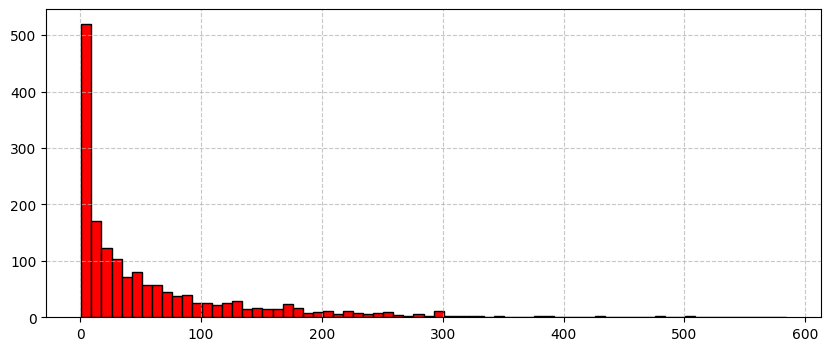

In [104]:
# Data visualizations

plt.figure(figsize=(10,4))
plt.hist(ratings['no. of ratings'], bins = 70, color='red', edgecolor = 'black')
plt.grid(linestyle = '--', alpha=0.7)
plt.show()

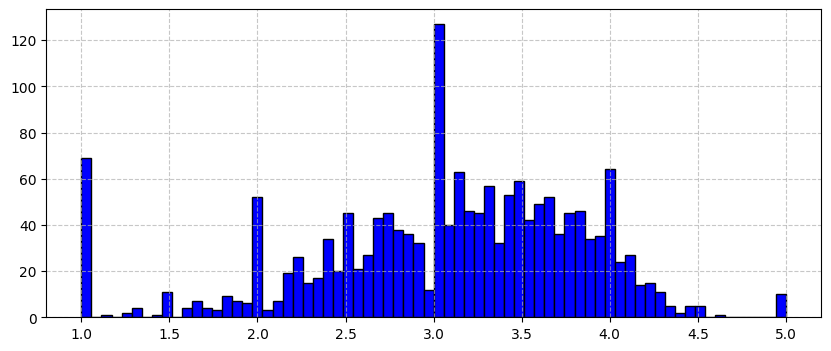

In [105]:
plt.figure(figsize=(10,4))
plt.hist(ratings['rating'], bins = 70, color='blue', edgecolor = 'black')
plt.grid(linestyle = '--', alpha=0.7)
plt.show()

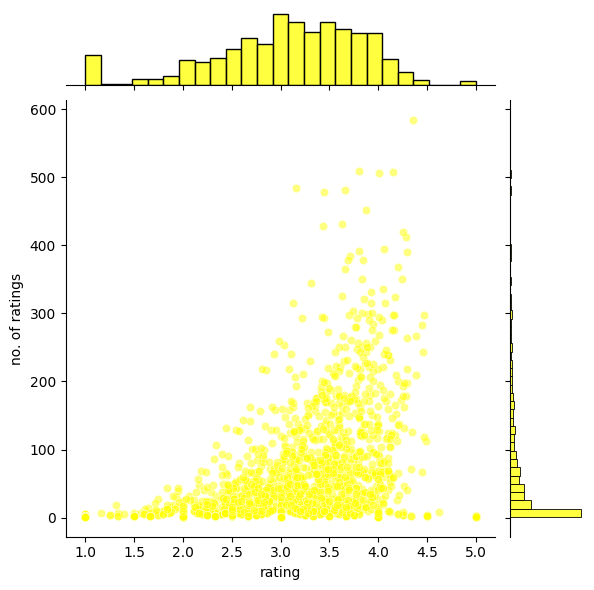

In [106]:
# Joining both of the above graphs to see more clear observations

sns.jointplot(x='rating', y = 'no. of ratings', data = ratings, alpha = 0.5, color = 'yellow')

***Recommending Similar Movies***

Here I'm going create matrix that has the user ids on one access and the movie title on another axis. Each cell consists of the rating the users gave to that movies. Note there must be NaN or null values because most of people have not seen most of the movies.

In [107]:
print(Ratings.shape)

(100003, 4)


In [121]:
User_rating = Movies.pivot_table(index='user_id',columns='title',values='rating')
User_rating.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
ratings.sort_values('no. of ratings', ascending=False).head(20)

,rating,no. of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [110]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [111]:
starwars_user_ratings = User_rating['Star Wars (1977)']
toystory_user_ratings = User_rating['Toy Story (1995)']

In [112]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

Now I'm going to show correlation between two pandas series with the method corrwith()

In [113]:
similar_to_starwars = User_rating.corrwith(starwars_user_ratings)
similar_to_toystory = User_rating.corrwith(toystory_user_ratings)

Now before going further to show correlation I have to clean dataset and remove all the NaN values and use Data Frame instead of a series.

In [114]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [115]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [116]:
corr_starwars = corr_starwars.join(ratings['no. of ratings'])
corr_starwars.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [117]:
corr_starwars[corr_starwars['no. of ratings']>100].sort_values('Correlation', ascending = False).head(10)

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


So here You can see that I serched the movies reated to statwars and I got recommended on the basis of ratings so many movies. THese all are the action movies with best animations and all related to starwars. 

*Now the same method we will apply for cartoon comedy movie*

In [118]:
toystory_user_ratings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

In [119]:
corr_toystory = pd.DataFrame(similar_to_toystory, columns=['Correlation'])
corr_toystory.dropna(inplace=True)
corr_toystory = corr_toystory.join(ratings['no. of ratings'])
corr_toystory[corr_toystory['no. of ratings']>100].sort_values('Correlation', ascending = False).head(10)

,Correlation,no. of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


Here you can see the movies related to Toy Story i.e comedy cartoon movie on the basis of the ratings anmd views, it gives the best movies on the top and others at the end. 

Now let's Search the movies related to angry man.

In [128]:
angryman_user_rating = User_rating['12 Angry Men (1957)']
similar_to_angryman = User_rating.corrwith(angryman_user_rating)

In [129]:
angryman_user_rating.head()

user_id
0    NaN
1    5.0
2    NaN
3    NaN
4    NaN
Name: 12 Angry Men (1957), dtype: float64

In [130]:
corr_angryman = pd.DataFrame(similar_to_angryman, columns=['Correlation'])
corr_angryman.dropna(inplace=True)
corr_angryman = corr_angryman.join(ratings['no. of ratings'])
corr_angryman[corr_angryman['no. of ratings']>100].sort_values('Correlation', ascending= False).head(10)

,Correlation,no. of ratings
title,,
12 Angry Men (1957),1.000000,125
Ulee's Gold (1997),0.619544,184
Rear Window (1954),0.570513,209
Seven Years in Tibet (1997),0.549939,155
Clerks (1994),0.528173,148
Singin' in the Rain (1952),0.520844,137
Vertigo (1958),0.509460,179
Army of Darkness (1993),0.477251,116
Mr. Smith Goes to Washington (1939),0.470078,105
